In [1]:
# Load all dictionaries
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon

In [2]:
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

def heatmap(data, title):
    ax = sns.heatmap(data,vmin=0., vmax=1., cmap= 'viridis',
                    cbar_kws={"shrink": .82, 'ticks' : [0,0.33,0.66,1], 'label': 'decoding strength'}) ##sns.cm.rocket_r
    #ax = sns.heatmap(data, cmap= 'viridis') ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('train')
    plt.gca().set_xlabel('test (TRs)')
    plt.gca().set_title(title)
    plt.gca().set_xticks([0,4,8,12,16])
    plt.gca().set_xticklabels([0,4,8,12,16])
    plt.gca().set_yticks([0,4,8,12,16])
    plt.gca().set_yticklabels([0,4,8,12,16])
    plt.show(block=False)

In [43]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_b001_target_mix_octave.xlsx'


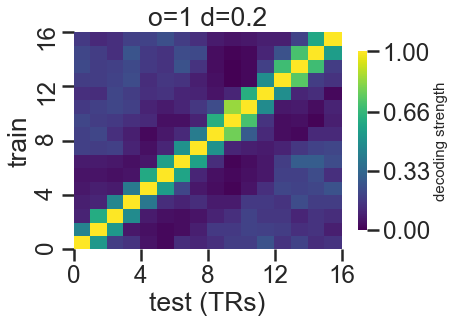

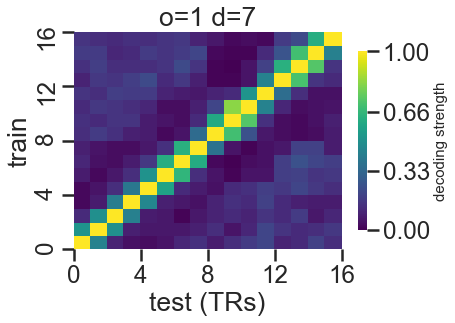

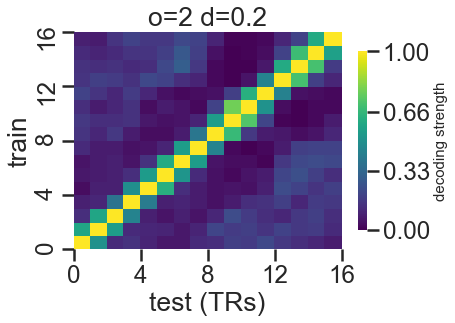

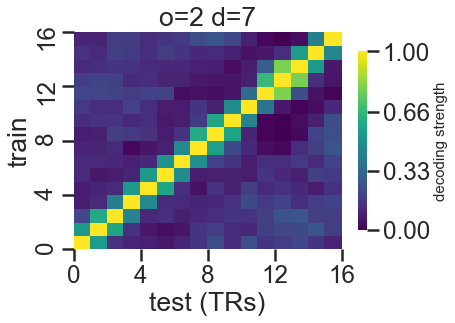

In [44]:
titles=['o=1 d=0.2', 'o=1 d=7', 'o=2 d=0.2', 'o=2 d=7']

for idx, sheets in enumerate(['b001_visual_1_0.2', 'b001_visual_1_7', 'b001_visual_2_0.2', 'b001_visual_2_7']):
    Df = pd.read_excel(path_save_signal, sheet_name=sheets)
    heatmap(Df, titles[idx])

## Shuffle

In [48]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\shuff_cross_b001_target_mix_octave.xlsx'
import xlrd
xls = xlrd.open_workbook(path_save_signal, on_demand=True)
xls.sheet_names()

['b001_ips_1_0.2_shuff_0',
 'b001_ips_1_0.2_shuff_1',
 'b001_ips_1_0.2_shuff_10',
 'b001_ips_1_0.2_shuff_11',
 'b001_ips_1_0.2_shuff_12',
 'b001_ips_1_0.2_shuff_13',
 'b001_ips_1_0.2_shuff_14',
 'b001_ips_1_0.2_shuff_15',
 'b001_ips_1_0.2_shuff_16',
 'b001_ips_1_0.2_shuff_17',
 'b001_ips_1_0.2_shuff_18',
 'b001_ips_1_0.2_shuff_19',
 'b001_ips_1_0.2_shuff_2',
 'b001_ips_1_0.2_shuff_20',
 'b001_ips_1_0.2_shuff_21',
 'b001_ips_1_0.2_shuff_22',
 'b001_ips_1_0.2_shuff_23',
 'b001_ips_1_0.2_shuff_24',
 'b001_ips_1_0.2_shuff_25',
 'b001_ips_1_0.2_shuff_26',
 'b001_ips_1_0.2_shuff_27',
 'b001_ips_1_0.2_shuff_28',
 'b001_ips_1_0.2_shuff_29',
 'b001_ips_1_0.2_shuff_3',
 'b001_ips_1_0.2_shuff_30',
 'b001_ips_1_0.2_shuff_31',
 'b001_ips_1_0.2_shuff_32',
 'b001_ips_1_0.2_shuff_33',
 'b001_ips_1_0.2_shuff_34',
 'b001_ips_1_0.2_shuff_35',
 'b001_ips_1_0.2_shuff_36',
 'b001_ips_1_0.2_shuff_37',
 'b001_ips_1_0.2_shuff_38',
 'b001_ips_1_0.2_shuff_39',
 'b001_ips_1_0.2_shuff_4',
 'b001_ips_1_0.2_shuff_40

## Train in 1_7 and test in the rest 

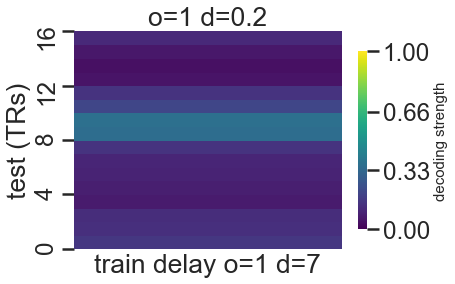

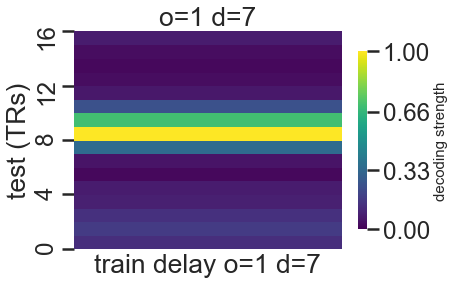

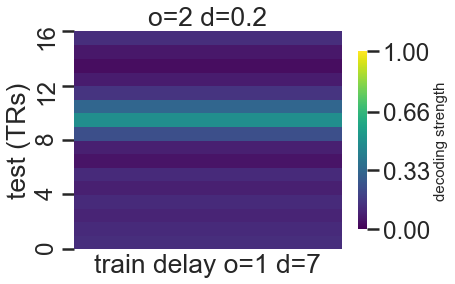

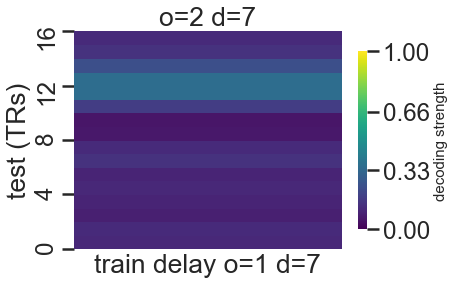

In [9]:
def heatmap_cond(data, title):
    ax = sns.heatmap(data,vmin=0., vmax=1., cmap= 'viridis',
                    cbar_kws={"shrink": .82, 'ticks' : [0,0.33,0.66,1], 'label': 'decoding strength'}) ##sns.cm.rocket_r
    #ax = sns.heatmap(data, cmap= 'viridis') ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('test (TRs)')
    plt.gca().set_xlabel('train delay o=1 d=7')
    plt.gca().set_title(title)
    plt.gca().set_yticks([0,4,8,12,16])
    plt.gca().set_yticklabels([0,4,8,12,16])
    plt.gca().set_xticks([])
    plt.show(block=False)


path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_b001_target_mix_octave_1_7.xlsx'

titles=['o=1 d=0.2', 'o=1 d=7', 'o=2 d=0.2', 'o=2 d=7']

for idx, sheets in enumerate(['b001_visual_1_0.2', 'b001_visual_1_7', 'b001_visual_2_0.2', 'b001_visual_2_7']):
    Df = pd.read_excel(path_save_signal, sheet_name=sheets)
    heatmap_cond(Df, titles[idx])

In [6]:
Df

,0
0,0.109890
1,0.120879
2,0.087912
3,0.098901
4,0.109890
5,0.098901
6,0.142857
7,0.120879
8,0.065934
9,0.054945
